## Semantic Virology Papers Filter

Clone the repository https://github.com/aioaneia/semantic-papers-filter

In [ ]:
! git clone https://github.com/aioaneia/semantic-papers-filter

In [ ]:
cd /src

Import modules

In [ ]:
import sys
sys.path.append('/src/.')

In [1]:
import yaml

from src.data.data_loader import DataLoader
from src.data.preprocessor import Preprocessor
from src.filters.nlp_semantic_filter import SemanticFilter
from src.filters.llm_semantic_filter import PaperClassifier
from src.pipelines.llm_pipeline import Pipeline

# Load configuration
with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

# Initialize components
data_loader     = DataLoader(config['DATASET_PATH'])
preprocessor    = Preprocessor()
nlp_classifier  = SemanticFilter()
llm_classifier  = PaperClassifier()

# Create and run pipeline
pipeline = Pipeline(
    data_loader,
    preprocessor,
    nlp_classifier,
    llm_classifier
)

print("Processing papers...")

# Process papers using NLP pipeline
pipeline.process_by_nlp(limit=10)

print("Saving results...")
pipeline.save_results("../results", "nlp")

print("Processing complete.")

ModuleNotFoundError: No module named 'src'

### Plot and save statistics

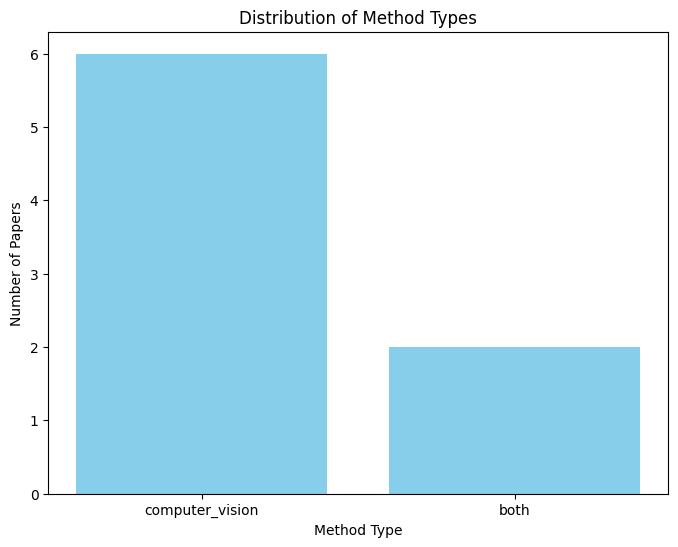

Total papers processed: 11450
Total relevant papers: 8
Relevance percentage: 0.07%

Method distribution:
- computer_vision: 6 papers (75.0%)
- both: 2 papers (25.0%)

Top Method Names by Year:

Year: 2024
- : 3 occurrences
- deep learning: 1 occurrences
- deep-learning, encoder, decoder: 1 occurrences
- neural network, deep learning: 1 occurrences
- cnn, neural network, convolutional neural network: 1 occurrences


In [ ]:
pipeline.plot_statistics("../results")